In [1]:
import json

import numpy as np

In [2]:

with open("osg_astar_mice_results.json") as f:
    data = json.load(f)

for strategy, programs in data["strategies"].items():
    print(f"\n{'=' * 70}")
    print(f"  {strategy}")
    print(f"{'=' * 70}")
    print(f"  {'#':<4} {'Latency':>10} {'Inv F1':>10} {'Not-Inv F1':>12}  Program")
    print(f"  {'-'*4} {'-'*10} {'-'*10} {'-'*12}  {'-'*30}")
    for i, p in enumerate(programs):
        print(
            f"  {i:<4} {p['latency']:>9.1f}s"
            f" {p['investigation_f1']:>10.4f}"
            f" {p['not_investigation_f1']:>12.4f}"
            f"  {p['program']}"
        )


  AStar
  #       Latency     Inv F1   Not-Inv F1  Program
  ---- ---------- ---------- ------------  ------------------------------
  0         14.2s     0.5794       0.7549  (output (mul (running_avg_last5 (affine_res_angle_head_body)) (running_avg_window5 (affine_overlap_bboxes))))
  1         15.6s     0.4516       0.4051  (output (mul (running_avg_last5 (affine_res_angle_head_body)) (running_avg_last5 (affine_overlap_bboxes))))
  2         16.8s     0.1887       0.8626  (output (mul (running_avg_last5 (affine_res_angle_head_body)) (running_avg_window11 (affine_overlap_bboxes))))
  3         18.1s     0.3892       0.0593  (output (mul (running_avg_last5 (affine_res_angle_head_body)) (running_avg_last10 (affine_overlap_bboxes))))
  4         18.1s     0.3871       0.0000  (output (mul (running_avg_last5 (affine_res_angle_head_body)) (running_avg_window5 (affine_res_angle_head_body))))
  5         18.1s     0.2424       0.3529  (output (mul (running_avg_last5 (affine_res_angle_head_

In [3]:
print(f"\n{'=' * 70}")
print("  Summary")
print(f"{'=' * 70}")
print(f"  {'Strategy':<30} {'First':>8} {'Last':>8} {'Best Inv':>10} {'Best NI':>10} {'Mean Inv':>10} {'Mean NI':>10}")
print(f"  {'-'*30} {'-'*8} {'-'*8} {'-'*10} {'-'*10} {'-'*10} {'-'*10}")
for strategy, programs in data["strategies"].items():
    lats = [p["latency"] for p in programs]
    inv = [p["investigation_f1"] for p in programs]
    ni = [p["not_investigation_f1"] for p in programs]
    print(
        f"  {strategy:<30}"
        f" {min(lats):>7.1f}s"
        f" {max(lats):>7.1f}s"
        f" {max(inv):>10.4f}"
        f" {max(ni):>10.4f}"
        f" {sum(inv)/len(inv):>10.4f}"
        f" {sum(ni)/len(ni):>10.4f}"
    )


  Summary
  Strategy                          First     Last   Best Inv    Best NI   Mean Inv    Mean NI
  ------------------------------ -------- -------- ---------- ---------- ---------- ----------
  AStar                             14.2s    32.6s     0.5794     0.8626     0.3172     0.5009
  OSGAstar                           8.4s    11.1s     0.5576     0.8636     0.2892     0.4666


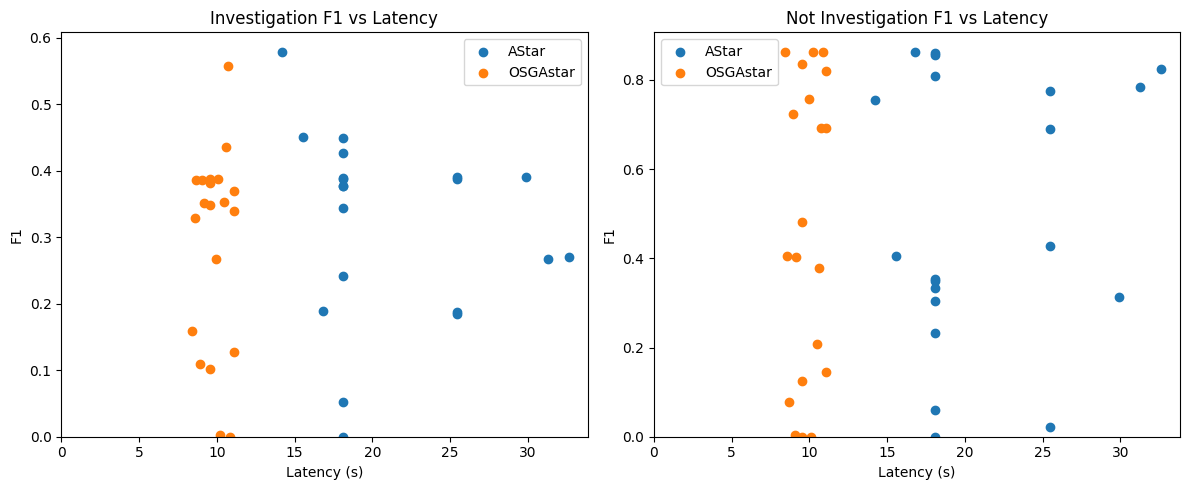

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

time_to_best = {}
for strategy, programs in data["strategies"].items():
    lats = [p["latency"] for p in programs]
    inv = [p["investigation_f1"] for p in programs]
    ni = [p["not_investigation_f1"] for p in programs]
    axes[0].scatter(lats, inv, label=strategy)
    axes[1].scatter(lats, ni, label=strategy)
    time_to_best[strategy] = np.array([lats[np.argmax(inv)], lats[np.argmax(ni)]])

axes[0].set_xlabel("Latency (s)")
axes[0].set_ylabel("F1")
axes[0].set_title("Investigation F1 vs Latency")
axes[0].legend()

axes[1].set_xlabel("Latency (s)")
axes[1].set_ylabel("F1")
axes[1].set_title("Not Investigation F1 vs Latency")
axes[1].legend()

for ax in axes:
    ax.set_ylim(0, ax.get_ylim()[1])
    ax.set_xlim(0, ax.get_xlim()[1])

fig.tight_layout()
plt.show()

In [5]:
for k, delta in zip(("inv", "not inv"), time_to_best["OSGAstar"] / time_to_best["AStar"]):
    print(f"{k:20s}: {delta - 1:+.0%}")

inv                 : -24%
not inv             : -35%
